In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
%pylab inline

plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["figure.dpi"] =  150

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
from tensorpotential.utils import *

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-23 23:00:09.394058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771884009.411901 1153905 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771884009.417693 1153905 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771884009.430699 1153905 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771884009.430712 1153905 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771884009.430713 1153905 computation_placer.cc:177] computation placer alr

# Initialize

In [5]:
fit_dict={}

# Add new fits here

In [6]:
folders=discovery_fit_folders(".")
folders

['./seed/2', './seed/3', './seed/1']

# Rerun to update

In [7]:
update_fit_metrics(fit_dict, folders)

./seed/2: 140 epochs
./seed/3: 140 epochs
./seed/1: 140 epochs


In [11]:
fkey="mae/depa"

In [12]:
common_prefix,df, gdf=process_fit_dict(fit_dict, fkey=fkey, align_folder=True)

In [15]:
df[["name","mae/depa","mae/f_comp",
   
    "epoch"]].sort_values(fkey).head(50)

,name,mae/depa,mae/f_comp,epoch
127,./seed/2,0.003961,0.006629,128.0
130,./seed/3,0.008333,0.013867,131.0
119,./seed/1,0.011717,0.005347,120.0


In [16]:
# gdf

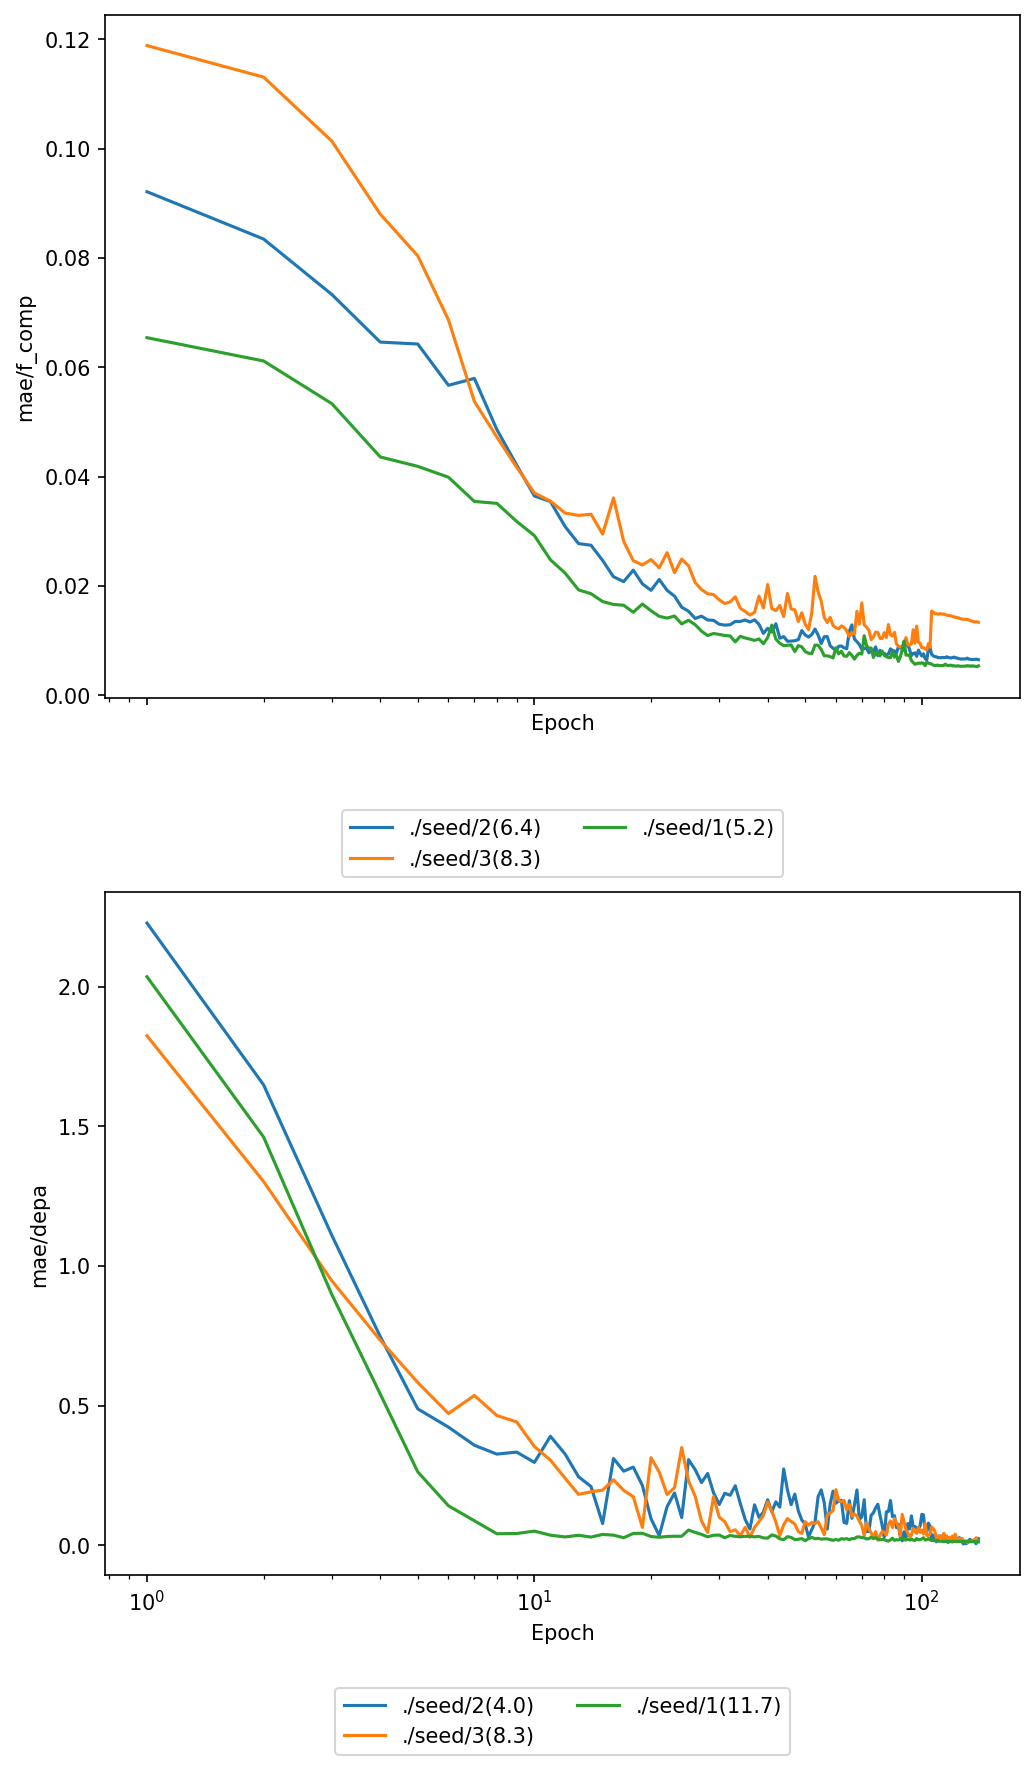

In [17]:
fig, ax_e, ax_f = plot_dashboard(fit_dict,
                                 plot_train=False,
                                 label="shortname_and_seed", 
                                 metric="mae" # 
                                )
ax_e.legend(ncol=2, bbox_to_anchor=(0.5,-0.15), loc="upper center")
ax_f.legend(ncol=2, bbox_to_anchor=(0.5,-0.15), loc="upper center")


ax_e.set_xscale('log')
fig.suptitle(common_prefix)
fig.tight_layout()